# HW8
## Author: Fiona Fan

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as hr

%matplotlib inline


## Problem 1 (1)

In [10]:
df = pd.read_csv('College.csv')
df.Private = pd.get_dummies(df.Private)
X = pd.DataFrame(scale(df),  columns=df.columns)
# X.Private

In [11]:
pca = PCA().fit(X)
column_names = [f'V{i}' for i in range(1, len(df.columns)+1)]
pca_loadings = pd.DataFrame(pca.components_.T, index=df.columns, columns=column_names)
# pca_loadings
numV=len(df.columns)

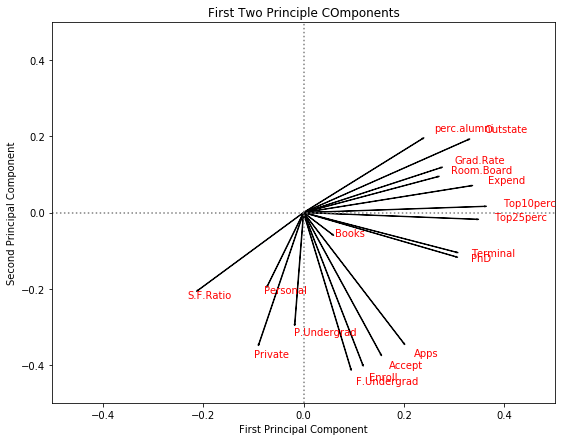

In [23]:

def plot_pca(pca_loadings, xmin, xmax, ymin, ymax,numV):
    
    fig , ax = plt.subplots(figsize=(9,7))

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # Plot reference lines
    ax.hlines(0,xmin, xmax, linestyles='dotted', colors='grey')
    ax.vlines(0,ymin, ymax, linestyles='dotted', colors='grey')

    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')

    # Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
    a = 1.1 
    for i in pca_loadings[['V1', 'V2']].index:
        ax.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

    # Plot vectors
    for i in range(numV):
        ax.arrow(0,0,pca_loadings.V1[i], -pca_loadings.V2[i])
    ax.set_title('First Two Principle COmponents')
    return ax
plot_pca(pca_loadings, -0.5,0.5,-0.5,0.5,numV)

The first component seems to be mostly correlated with 'Top10perc', 'Top20perc', 'Expend', 'Terminal', 'PhD', 'Room.Board', 'Grad.Rate' and etc. The second component seemst obe mostly correlated with F.Undergrad, P.Undergrad, Peronal, Private, Enroll and etc. 

## Problem 1 (2)

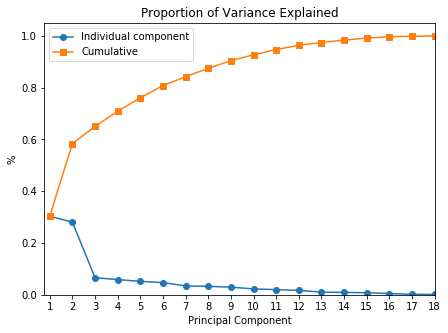

In [29]:
def plot_cum(pca,numV):    
    plt.figure(figsize=(7,5))

    plt.plot(list(range(1,numV+1)), pca.explained_variance_ratio_, '-o', label='Individual component')
    plt.plot(list(range(1,numV+1)), np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

    plt.title('Proportion of Variance Explained')
    plt.xlabel('Principal Component')
    plt.ylabel('%')
    plt.xlim(0.75,4.25)
    plt.ylim(0,1.05)
    plt.xticks(list(range(1,numV+1)))
    plt.legend(loc=2);
plot_cum(pca,numV)

In [25]:
print(f'The first two PCs explain {round(pca.explained_variance_ratio_[:2].sum()*100,2)}% of the variance.')

The first two PCs explain 58.42% of the variance.


## Problem 2(1)

In [26]:


df2 = pd.read_csv('USArrests.csv', index_col=0)
X2 = pd.DataFrame(scale(df2), index=df2.index, columns=df2.columns)
column_names2 = [f'V{i}' for i in range(1, len(df2.columns)+1)]
PC_names = [f'PC{i}' for i in range(1, len(df2.columns)+1)]
numV2=len(df2.columns)


pca2 = PCA().fit(X2)
pca_loadings2 = pd.DataFrame(pca2.components_.T, index=df2.columns, columns=column_names2)
# pca_loadings
# plot_pca(pca_loadings2,-1,1,-1,1,numV2)
df_plot = pd.DataFrame(pca2.fit_transform(X2), columns=PC_names, index=X2.index)


pca2_full = PCA().fit(df2)
pca_loadings2_full = pd.DataFrame(pca2_full.components_.T, index=df2.columns, columns=column_names2)
df_plot_full = pd.DataFrame(pca2_full.fit_transform(df2), columns=PC_names, index=X2.index)


Text(0.5,1,'Mapping of Dataset to First and Second PC')

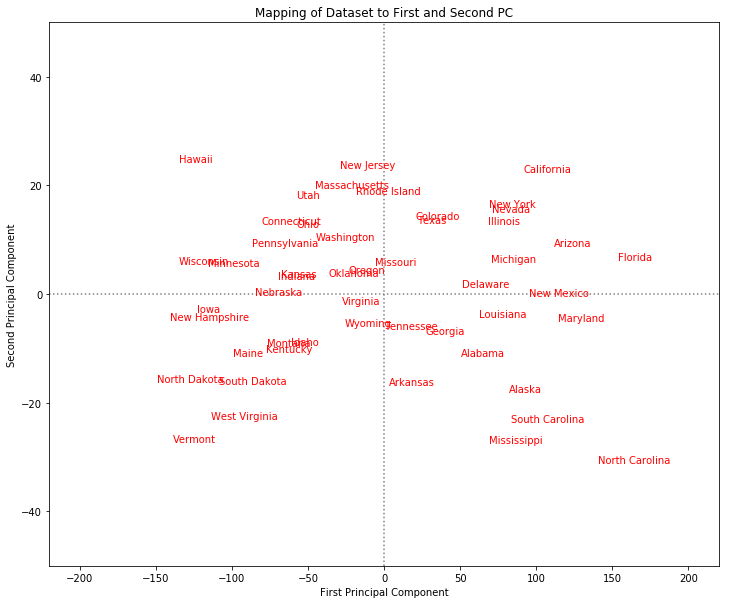

In [28]:

fig , ax1 = plt.subplots(figsize=(12,10))
xmin = -220
xmax = 220
ymin = -50
ymax = 50

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

# Plot Principal Components 1 and 2
for i in df_plot_full.index:
    ax1.annotate(i, (df_plot_full.PC1.loc[i], -df_plot_full.PC2.loc[i]), ha='center', color='r')

# Plot reference lines
ax1.hlines(0,xmin, xmax, linestyles='dotted', colors='grey')
ax1.vlines(0,ymin, ymax, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('Mapping of Dataset to First and Second PC')

# ax2 = plot_pca(pca_loadings2,-1,1,-1,1,numV2)

## Problem 2(2)~(4)

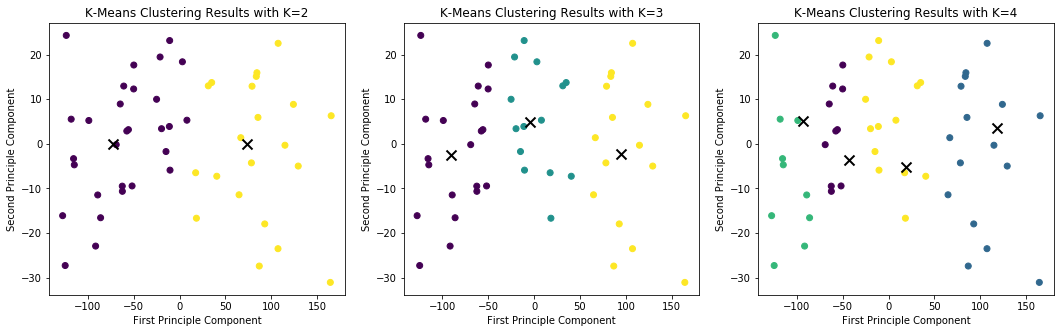

In [18]:
km2 = KMeans(n_clusters=2, n_init=20).fit(df2)
km3 = KMeans(n_clusters=3, n_init=20).fit(df2)
km4 = KMeans(n_clusters=4, n_init=20).fit(df2)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))
# df_plot
[i.set_xlabel('First Principle Component') for i in [ax1, ax2, ax3]]
[i.set_ylabel('Second Principle Component') for i in [ax1, ax2, ax3]]
[k.set_title(f'K-Means Clustering Results with K={i+2}') for i,k in enumerate([ax1, ax2, ax3])]
temp = []
[temp.append(pca2_full.fit_transform(k.cluster_centers_)) for k in [km2, km3, km4]]
ax1.scatter(df_plot_full.PC1, -df_plot_full.PC2, c=km2.labels_) 
# temp  = pca2_full.fit_transform(km2.cluster_centers_)
ax1.scatter(temp[0][:,0], temp[0][:,1], marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)

ax2.scatter(df_plot_full.PC1, -df_plot_full.PC2, c=km3.labels_) 
ax2.scatter(temp[1][:,0], temp[1][:,1], marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)

ax3.scatter(df_plot_full.PC1, -df_plot_full.PC2, c=km4.labels_) 
ax3.scatter(temp[2][:,0], temp[2][:,1], marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)



## Problem 2 (5)

Text(0,0.5,'Second Principle Component')

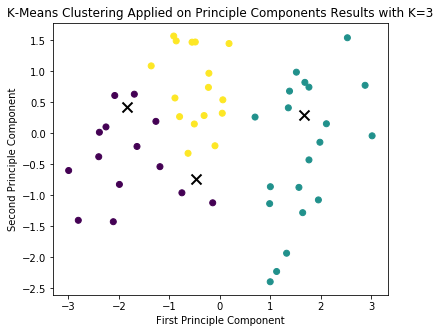

In [19]:
km3_pc = KMeans(n_clusters=3, n_init=20).fit(df_plot)

fig, ax = plt.subplots( figsize=(6,5))
# df_plot
ax.scatter(df_plot.PC1, -df_plot.PC2, c=km3_pc.labels_) 
ax.set_title('K-Means Clustering Applied on Principle Components Results with K=3')
ax.scatter(km3_pc.cluster_centers_[:,0], km3_pc.cluster_centers_[:,1], marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)
ax.set_xlabel('First Principle Component')
ax.set_ylabel('Second Principle Component')

In [20]:
# print(len(list(df2.index[km3.labels_ != km3_pc.labels_])))
d=df2.index[km3.labels_ != km3_pc.labels_]
print(f'The centeroid positions are different. {", ".join(list(d))} now belong to different groups.')

31
The centeroid positions are different. Alabama, Alaska, Arizona, Arkansas, California, Connecticut, Florida, Hawaii, Illinois, Indiana, Kansas, Louisiana, Maryland, Massachusetts, Michigan, Mississippi, Nevada, New Jersey, New Mexico, New York, North Carolina, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, Utah, Virginia, Washington, Wyoming now belong to different groups.


## Problem 2 (6)~(7)

The states in group 1 are Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina.
The states in group 2 are Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming.
The states in group 3 are Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin.


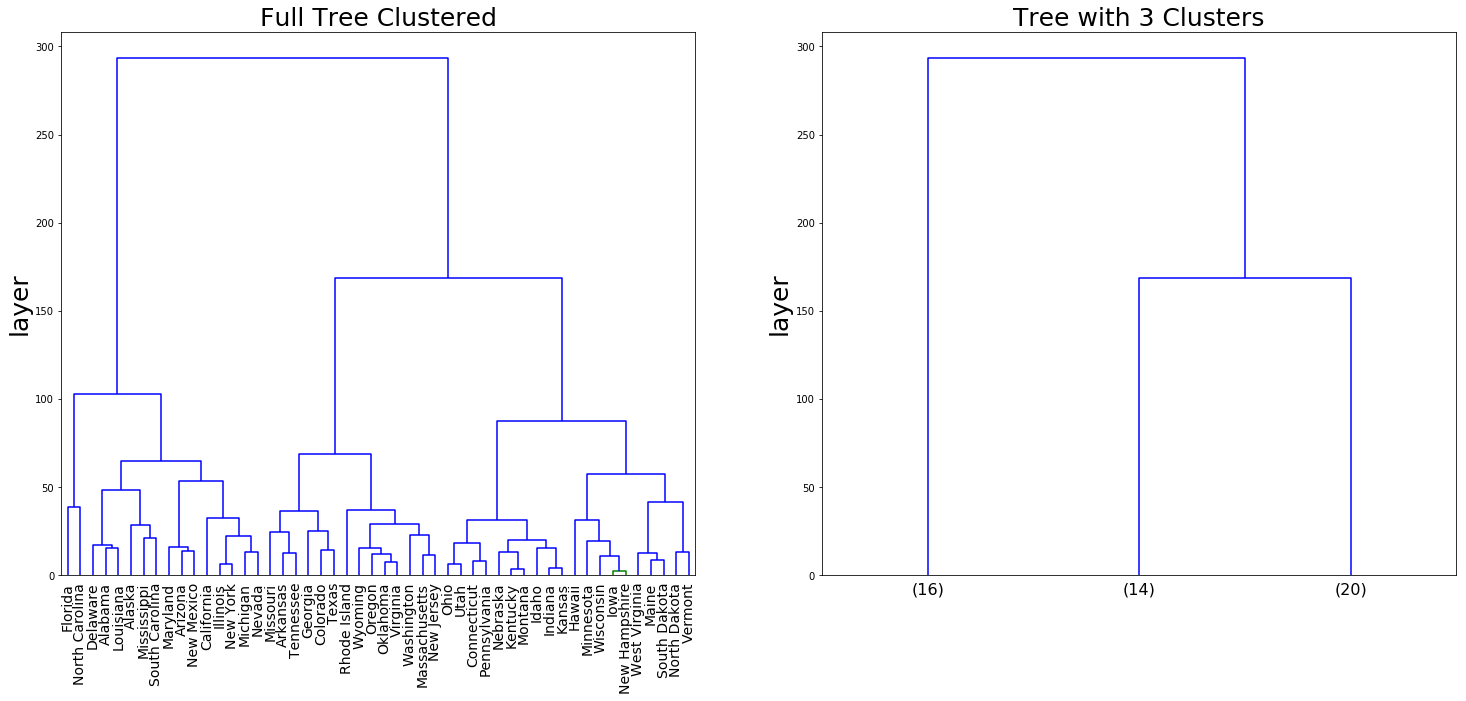

In [35]:
# Z = linkage(df2, method='complete')
Z = hr.complete (df2)
def plot_cluster(tree,n):
    fig,(ax1, ax2) = plt.subplots(1,2, figsize=(25, 10))
    cuttree = hr.fcluster(tree,n,criterion='maxclust')
    cuttree_cat=pd.Series(cuttree, dtype="category")
    temp=pd.Series(df2.index).groupby(cuttree_cat)
    dn = dendrogram(tree,labels=X2.index,  color_threshold=n, leaf_font_size=14, ax=ax1)
    dn2 = dendrogram(tree,truncate_mode='lastp', p=n, color_threshold=4, leaf_font_size=16, ax=ax2)
    [i.set_ylabel('layer',fontsize = 25) for i in (ax1, ax2)]
    ax1.set_title('Full Tree Clustered',fontsize=25)
    ax2.set_title(f'Tree with {n} Clusters',fontsize=25)
    for group, state in temp:
        print (f'The states in group {group} are {", ".join(list(state))}.')
plot_cluster(Z,3)

## Problem 2 (8)

The states in group 1 are Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming.
The states in group 2 are Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas.
The states in group 3 are Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee.


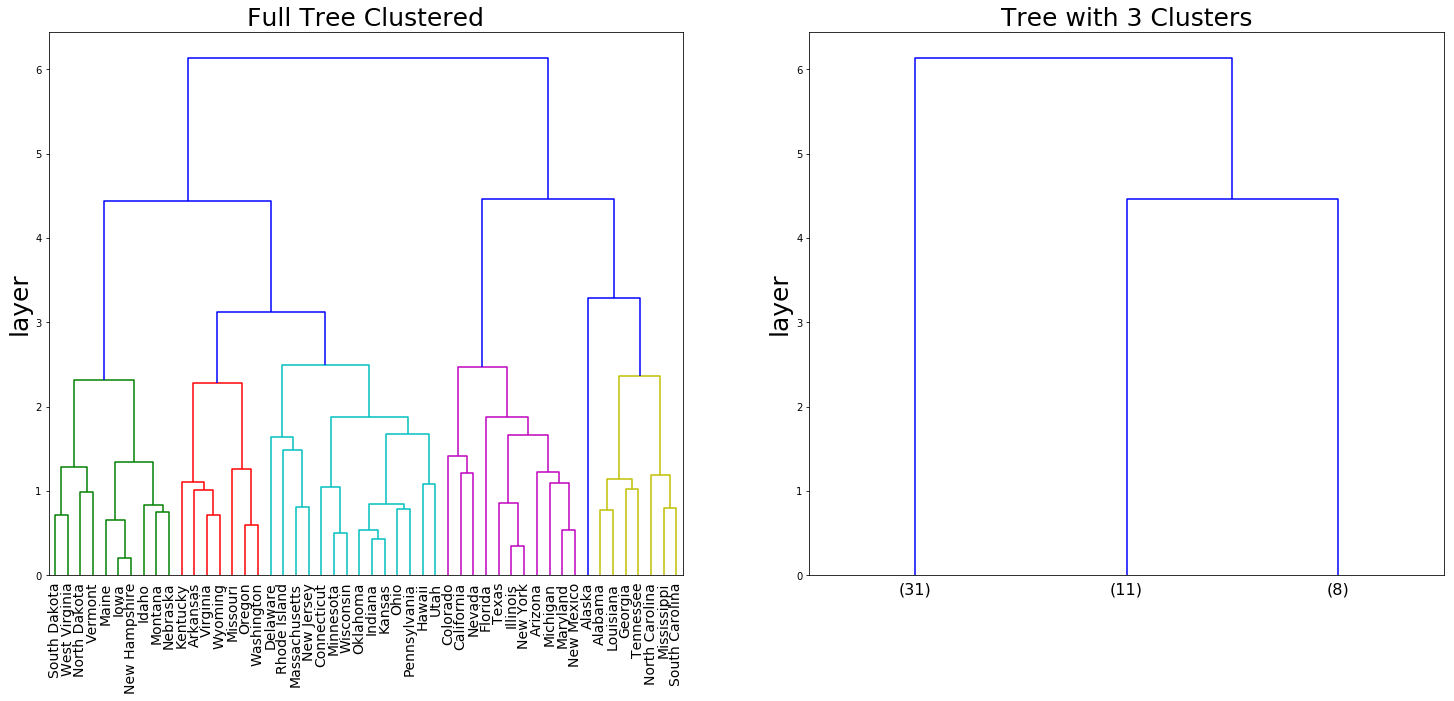

In [36]:
# print(X2)
Z2 = hr.complete (X2)
plot_cluster(Z2,3)